# TensorFlow Working

In [ ]:
#git commands in Git Bash to push commits in GitHub
##cd Personal/Self_Study/Projects/MyProject
##git add TensorFlow_Project.ipynb
##git commit -m "Update code"
##git push
##Useful link: https://readwrite.com/2013/09/30/understanding-github-a-journey-for-beginners-part-1/

In [ ]:
#example code to understand how tensorflow works for Deep Neural Networks (DNN)
#with made up xy data for regression model


#imports
import tensorflow as tf
import numpy as np
from tensorflow import keras

#define the NN
##this function builds a models with one hidden layer and just one neuron with one input value
model = tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
#compile the NN
##this function tries to learn by 
##1. starting with a random relation beween the input and output
##2. calculating the difference between real and estimated output (loss)
##3. changing the relation in order to reduce the loss (optimizer)
##4. repeat steps 2 and 3 for the number of epochs
model.compile(optimizer='sgd',loss='mean_squared_error')

#providing the data
##the exact relation is y = (2*x)-1
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

#training the NN
model.fit(xs,ys,epochs=500)

#try to predict
##the exact value is (2*10)-1 = 19
print(model.predict(np.array([10.0])))

In [ ]:
#example code to understand how tensorflow works
#dataset from fashionMNIST (curated by Zalando) using its API in tensorflow
#this is classification problem with 28X28 pixel grayscale images of clothes as input and labels as output
#each pixel can take any value from 0 to 255

#imports
import tensorflow as tf
print(tf.__version__)

#dataset
#get the fashionMNIST data from the tensorflow API
mnist = tf.keras.datasets.fashion_mnist #create an object to get the data
#there are about 70K data entries out of which 60K is automatically allocated for training and 10K is allocated for testing
(trainingImages,trainingLabels),(testImages,testLabels) = mnist.load_data() #load train and test data from object
#visualizing the dataset
import matplotlib.pyplot as plt
imgNum = 7
plt.imshow(trainingImages[imgNum])
print(trainingLabels[imgNum])
print(trainingImages[imgNum])
#normalizing the data to enable better learning of the model
trainingImages = trainingImages/255.0
testImages = testImages/255.0

#print(len([item for sublist in trainingImages[imgNum] for item in sublist]))


#define the NN model
##Sequential: That defines a SEQUENCE of layers in the neural network
##Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.
##Dense: Adds a layer of neurons
##Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.
##Relu effectively means "If X>0 return X, else return 0" -- so what it does is it only passes values 0 or greater to the next layer in the network.
##Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

#compile the NN model
##what are the different optimizer and loss parameters???
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#train the NN model with the training data
model.fit(trainingImages,trainingLabels,epochs=5)

#evaluating the model with the test data
model.evaluate(testImages,testLabels)


# #using callbacks to terminate the program when a desired accuracy is reached
# desiredAcc = 0.6
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('loss')<(1-desiredAcc)):
#       print("\nReached desired accuracy so cancelling training!")
#       self.model.stop_training = True

# callbacks = myCallback()

# model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])



#parameters that can change
##training test dataset distribution
##NN architecture - number of hidden layers and neurons in each layer
##normalization of data
##number of iterations (epochs)
##optimizer used
##loss function used





In [ ]:
#using callbacks to terminate the program when a desired accuracy is reached

desiredAcc = 0.7 #1 is 100% accuracy

#create a class for the callback which will take the log and check for a certain condition
class myCallback(tf.keras.callbacks.Callback):
#its good to use epoch_end since sometimes loss drops over a small data range but not on the whole data
  def on_epoch_end(self, epoch, logs={}): 
    if(logs.get('loss')<(1-desiredAcc)):
      print("\nReached desired accuracy so cancelling training!")
      self.model.stop_training = True

#instantiating the callback class
callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(trainingImages,trainingLabels),(testImages,testLabels) = mnist.load_data()
trainingImages = trainingImages/255.0
testImages = testImages/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(trainingImages, trainingLabels, epochs=10, callbacks=[callbacks]) # use callback as a parameter

In [ ]:
#the Flatten argument can be used with exact shape of the input
#the accuracy can be selected instead of the loss value in the callback function
#using callbacks to terminate the program when a desired accuracy is reached

desiredAcc = 0.9 #1 is 100% accuracy

#create a class for the callback which will take the log and check for a certain condition
class myCallback(tf.keras.callbacks.Callback):
#its good to use epoch_end since sometimes loss drops over a small data range but not on the whole data
  def on_epoch_end(self, epoch, logs={}): 
    if(logs.get('acc')>desiredAcc):
      print("\nReached desired accuracy so cancelling training!")
      self.model.stop_training = True

#instantiating the callback class
callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(trainingImages,trainingLabels),(testImages,testLabels) = mnist.load_data()
trainingImages = trainingImages/255.0
testImages = testImages/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(trainingImages, trainingLabels, epochs=10, callbacks=[callbacks]) # use callback as a parameter

In [34]:
#DNN are powerful for learning
#convolutions are filters applied to the data to highlight label-specific features
#adding convolutions to DNN to generates Convoluted Neural Networks (CNN)
#another useful filter to compress data is called pooling, which reduces the data by different logics

#the FMNIST example
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(trainImages,trainLabels),(testImages,testLabels) = mnist.load_data()
#normalizing data to lie between 0 and 1
trainImages = trainImages/255.0
testImages = testImages/255.0


#DNN
print("DNN:")
#define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
#compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#train model
model.fit(trainImages,trainLabels,epochs=5)
#evaluate model
testLoss = model.evaluate(testImages,testLabels)


#CNN and pooling
##using convolutions is similar to applying filters to images (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing))
##CNN may give better fit than DNN but care should be taken not to overfit
print("CNN & Pooling")
#data formating
##Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 
(trainImages,trainLabels),(testImages,testLabels) = mnist.load_data()
trainImages = trainImages.reshape(60000,28,28,1)
trainImages = trainImages/255.0
testImages = testImages.reshape(10000,28,28,1)
testImages = testImages/255.0
#define model
##Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:
## 1.The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
## 2. The size of the Convolution, in this case a 3x3 grid
## 3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
## 4. In the first layer, the shape of the input data.
##You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
#compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 
model.summary()
model.fit(trainImages, trainLabels, epochs=5) #very slow step since convolutions computation is 2X64X60000X26X26 and pooling computation is 2X60000X13X13
test_loss = model.evaluate(testImages, testLabels)

DNN:
Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.5030 - acc: 0.8228
Epoch 2/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3810 - acc: 0.8630
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3395 - acc: 0.8755
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3146 - acc: 0.8854
Epoch 5/5
10000/10000 [==============================] - 0s 31us/step
CNN & Pooling
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_____________________________________________________

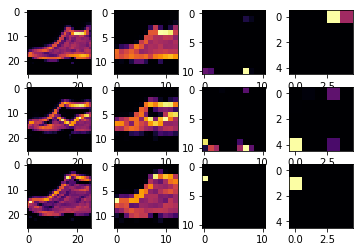

In [40]:
#visualizing the Convolutions and Pooling
##This code will show us the convolutions graphically. The print (test_labels[:100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.
#print(testLabels[:100])
labelID = 9
labelSet = [i for i,val in enumerate(testLabels[:100]) if val==labelID] #enumerate returns the index and value of the list

#import matplotlib.pyplot as plt
#plt.imshow(testImages[labelSet])

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=labelSet[0]
SECOND_IMAGE=labelSet[1]
THIRD_IMAGE=labelSet[2]
CONVOLUTION_NUMBER = 0
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(testImages[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(testImages[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(testImages[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)